In [ ]:
import numpy as np
import yaml
import os
import matplotlib.pyplot as plt

In [2]:
experiment_dirs = {
    "2020-2022": "experiments/20250513T161151",
    "2015-2022": "experiments/20250513T161154",
    "2005-2022": "experiments/20250513T161024",
    "gcs": "experiments/20250513T161533",
}

In [3]:
# get all times
experiment_times = {}
for experiment, experiment_dir in experiment_dirs.items():
    times_file = os.path.join(experiment_dir, "times_summary.yaml")
    with open(times_file, "r") as f:
        times = yaml.safe_load(f)["times"]
    experiment_times[experiment] = times

In [6]:
combined_args = {}
for experiment, experiment_dir in experiment_dirs.items():
    args_file = os.path.join(experiment_dir, "args.yaml")
    with open(args_file, "r") as f:
        args = yaml.safe_load(f)
    for args_key, args_value in args.items():
        if args_key not in combined_args:
            combined_args[args_key] = {}
        combined_args[args_key][experiment] = args_value
combined_args

{'batch_size': {'2020-2022': 5, '2015-2022': 5, '2005-2022': 5, 'gcs': 5},
 'chunks': {'2020-2022': 'auto',
  '2015-2022': 'auto',
  '2005-2022': 'auto',
  'gcs': 'auto'},
 'dask_scheduler': {'2020-2022': None,
  '2015-2022': None,
  '2005-2022': None,
  'gcs': None},
 'dask_threads_per_worker': {'2020-2022': 1,
  '2015-2022': 1,
  '2005-2022': 1,
  'gcs': 1},
 'dask_workers': {'2020-2022': 1, '2015-2022': 1, '2005-2022': 1, 'gcs': 1},
 'dataset': {'2020-2022': 'data/era5_weekly_aurora_2020-2022-wb13-1h-240x121.zarr-v3/',
  '2015-2022': 'data/era5_weekly_aurora_2015-2022-wb13-1h-240x121.zarr-v3/',
  '2005-2022': 'data/era5_weekly_aurora_2005-2022-wb13-1h-240x121.zarr-v3/',
  'gcs': 'gs://weatherbench2/datasets/era5_weekly/1959-2023_01_10-1h-240x121_equiangular_with_poles_conservative.zarr/'},
 'date_range': {'2020-2022': ['2020-01-01', '2022-12-31'],
  '2015-2022': ['2020-01-01', '2022-12-31'],
  '2005-2022': ['2020-01-01', '2022-12-31'],
  'gcs': ['2020-01-01', '2022-12-31']},
 'level

/tmp/ipykernel_2965896/2707932323.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = axs[0].boxplot(
/tmp/ipykernel_2965896/2707932323.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = axs[1].boxplot(


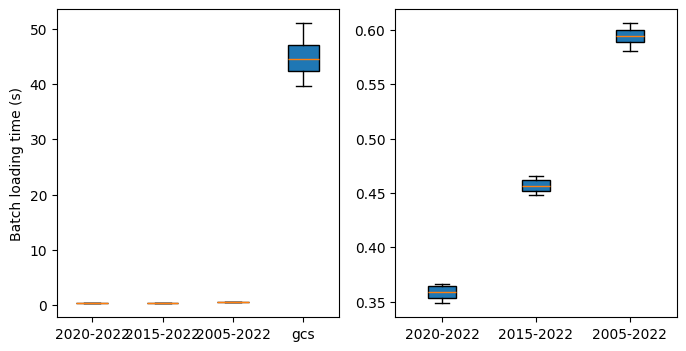

In [4]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))
axs[0].set_ylabel("Batch loading time (s)")

bplot = axs[0].boxplot(
    [experiment_times[experiment] for experiment in experiment_times.keys()],
    labels=experiment_times.keys(),
    showfliers=False,
    patch_artist=True,
)
bplot = axs[1].boxplot(
    [experiment_times[experiment] for experiment in experiment_times.keys() if experiment != "gcs"],
    labels=[experiment for experiment in experiment_times.keys() if experiment != "gcs"],
    showfliers=False,
    patch_artist=True,
)

In [5]:
for experiment, times in experiment_times.items():
    mean = np.mean(times)
    std = np.std(times)
    print(f"{experiment}: {mean:.2f} ± {std:.2f} s")

2020-2022: 0.39 ± 0.12 s
2015-2022: 0.47 ± 0.06 s
2005-2022: 0.62 ± 0.09 s
gcs: 44.47 ± 3.21 s
